REDUCCION DE DIMENSIONALIDAD

In [ ]:
"""
Su objetivo es transformar un conjunto de datos con un gran número de variables
(dimensiones) a un espacio de menor dimensión, manteniendo la mayor cantidad de
información relevante posible.
Se considera no supervisado porque se realiza sin utilizar etiquetas de
salida predefinidas en los datos.
"""

In [ ]:
"""
VEREMOS LOS METODOS LINEALES
"""

Análisis de Componentes Principales (PCA)

In [ ]:
"""
El Análisis de Componentes Principales (PCA) es una técnica estadística que
transforma un conjunto de variables posiblemente correlacionadas en un nuevo
conjunto de variables linealmente no correlacionadas llamadas
Componentes Principales (CP).
"""

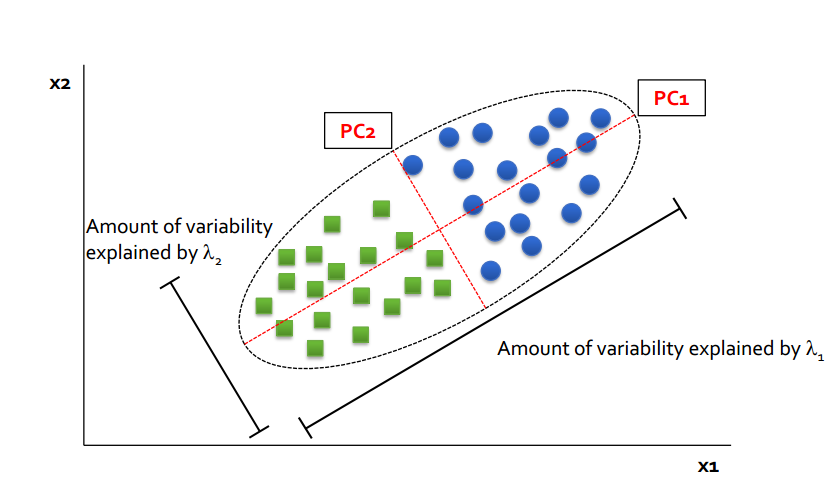

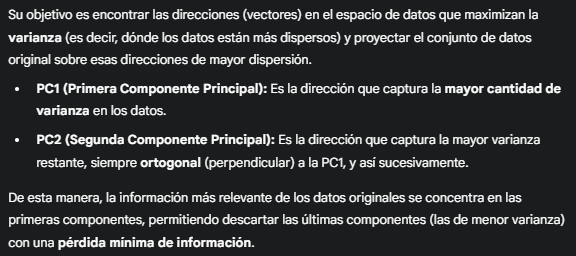

# PASOS PARA REALIZARLO  😐

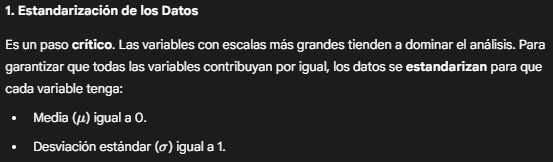

# ESTANDARIZACION DE DATOS 😐

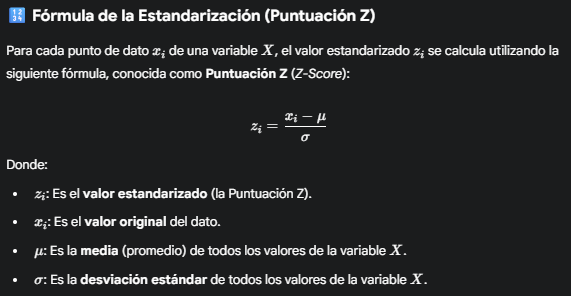

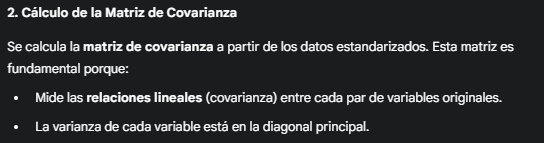

# QUE ES LA MATRIZ DE COVARIANZA 😐

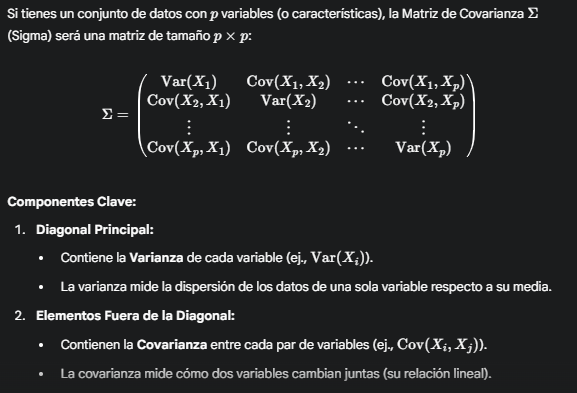

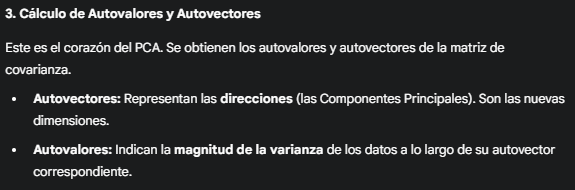

YA USTEDES SABEN...

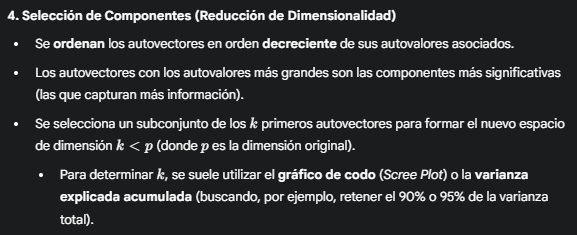

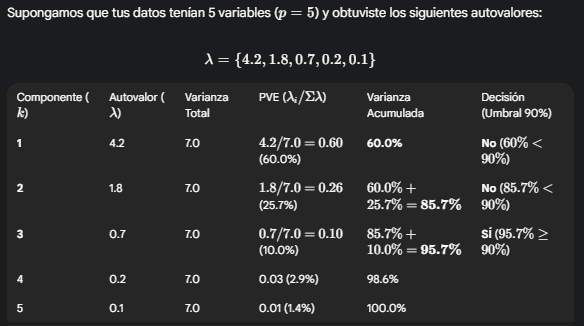

EFECTUAMOS LA REDUCCION DE LA DIMENSION DE NUESTRA MATRIZ ORIGINAL

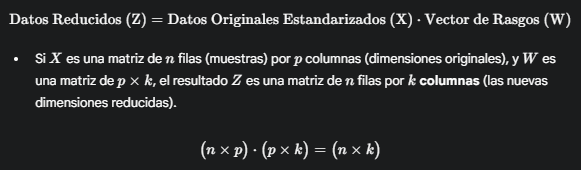

In [ ]:
"""
ACABAMOS DE QUITARLE COLUMNAS Y DE REDUCIR LOS DATOS PARA GRAFICAR
"""

# AHORA LOS NO LINEALES 😐

In [ ]:
"""
Estos métodos son cruciales cuando la estructura de los datos en alta dimensión
es compleja y no lineal, es decir, los datos se encuentran en una "variedad"
(manifold) curva o compleja dentro del espacio de alta dimensión.
"""

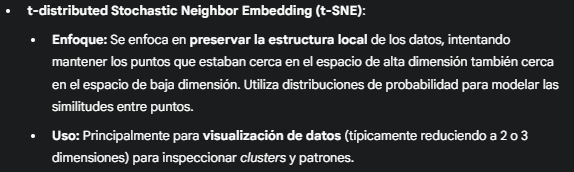

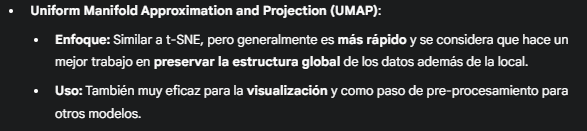

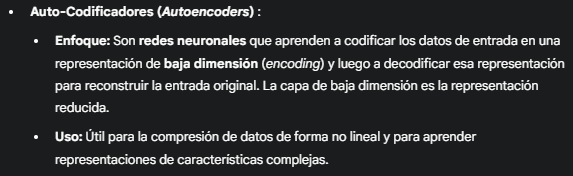

EJEMPLO LINEAL (PCA)

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# 1. Crear datos de ejemplo (Normalmente cargarías un DataFrame)
# Datos: 4 variables originales (p=4)
X = np.array([
    [10, 5, 1, 80],
    [12, 6, 2, 85],
    [8, 4, 3, 75],
    [15, 7, 4, 90],
    [9, 5, 1, 78]
])

# 2. Estandarización de los Datos (Paso Crítico para PCA)
# Aplicamos Z-score para que la media sea 0 y la desviación estándar sea 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA
# Especificar la varianza mínima a retener (ej. 90%)
pca = PCA(n_components=0.90)

pca.fit(X_scaled)

# 4. Transformar los datos
# X_pca es la matriz final con la dimensionalidad reducida (n x k)
X_pca = pca.transform(X_scaled)

# Mostrar resultados
print(f"Dimensiones originales: {X.shape[1]}")
print(f"Número de componentes seleccionadas (k): {pca.n_components_}")
print(f"Varianza total explicada por las 'k' componentes: {sum(pca.explained_variance_ratio_):.4f}")
print("---")
print("Primeras 3 filas de los datos transformados (X_pca):\n", X_pca[:3])

Dimensiones originales: 4
Número de componentes seleccionadas (k): 2
Varianza total explicada por las 'k' componentes: 0.9967
---
Primeras 3 filas de los datos transformados (X_pca):
 [[-0.91092884 -0.7429475 ]
 [ 0.86354897 -0.51601536]
 [-1.77837409  1.41677281]]


EJEMPLO NO LINEAL (t-distributed Stochastic Neighbor Embedding (t-SNE))

--- 1. Carga y Preparación de Datos ---
Dimensiones originales: (1797, 64)

--- 2. Análisis de Componentes Principales (PCA) ---
Número de componentes seleccionadas (k): 40
Varianza total retenida: 0.9508
Dimensiones después de PCA: (1797, 40)

--- 3. Visualización con t-SNE ---


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Dimensiones después de t-SNE: (1797, 2)


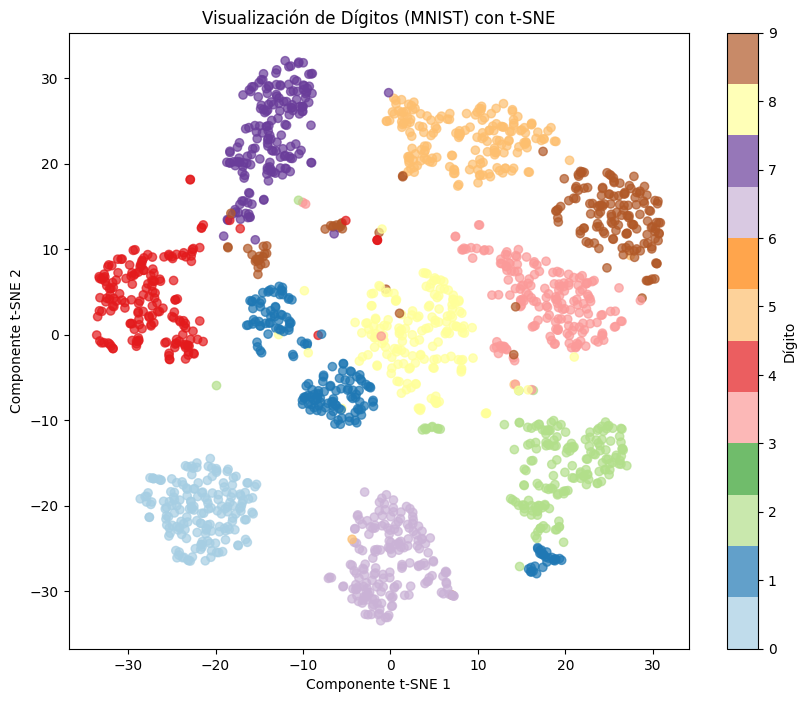

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Carga y Preparación de los Datos
# ------------------------------------
print("--- 1. Carga y Preparación de Datos ---")
digits = load_digits()
X = digits.data    # Datos (1797 muestras, 64 dimensiones/características)
y = digits.target  # Etiquetas (dígitos 0-9)
n_samples = X.shape[0]

# Estandarización de los Datos (Paso Crucial)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Dimensiones originales: {X.shape}")

# 2. Reducción de Dimensionalidad Lineal con PCA
# -----------------------------------------------
print("\n--- 2. Análisis de Componentes Principales (PCA) ---")

# Aplicar PCA para retener el 95% de la varianza
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

k = pca.n_components_ # Número de componentes seleccionadas
variance_explained = sum(pca.explained_variance_ratio_)

print(f"Número de componentes seleccionadas (k): {k}")
print(f"Varianza total retenida: {variance_explained:.4f}")
print(f"Dimensiones después de PCA: {X_pca.shape}")

# 3. Visualización No Lineal con t-SNE (de 64D a 2D)
# -----------------------------------------------------
print("\n--- 3. Visualización con t-SNE ---")

# NOTA: Por buenas prácticas, t-SNE se aplica a los datos originales estandarizados (X_scaled)
# o a los datos ya pre-reducidos por PCA si la dimensionalidad original es muy alta (>50).
# Aquí lo aplicaremos sobre los datos estandarizados directamente para máxima visualización.

# Perplejidad: 30 (valor por defecto, seguro ya que 30 < 1797)
tsne = TSNE(n_components=2,
            perplexity=30,
            n_iter=500,
            random_state=42,
            init='pca',
            learning_rate='auto')

X_tsne = tsne.fit_transform(X_scaled)

print(f"Dimensiones después de t-SNE: {X_tsne.shape}")

# 4. Gráfico de Dispersión (Visualización 2D)
# ---------------------------------------------
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Paired', alpha=0.7)
plt.title("Visualización de Dígitos (MNIST) con t-SNE")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.colorbar(scatter, ticks=range(10), label='Dígito')
plt.show()